# CHE 1148 Assignment 4
Name: Fendi Halim Tjoa

Student ID: 100753017

Instructor: Nikolaos Anesiadis

TA: Kavya Siddartha

Note: This notebook runs on google colab


In [ ]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.cross_decomposition import PLSRegression
from pandas.tseries.offsets import DateOffset
from itertools import product
from pandas.tseries.offsets import MonthEnd 
from sklearn.model_selection import train_test_split
from matplotlib.ticker import PercentFormatter
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
Retail_Data_Response = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Retail_Data_Response.csv') #import Retail_Data_Transactions.csv as pd dataframe
annual_features = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/annual_features.xlsx') #import Retail_Data_Transactions.csv as pd dataframe
annual_day_of_week_counts_pivot = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/annual_day_of_week_counts_pivot.xlsx') #import Retail_Data_Transactions.csv as pd dataframe

Creating annual_features_output table

In [ ]:
annual_features_output = annual_features.merge(annual_day_of_week_counts_pivot, on = 'customer_id')
annual_features_output = annual_features_output.merge(Retail_Data_Response, on ='customer_id')
annual_features_output.set_index('customer_id', inplace = True)
annual_features_output

,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_cnt_2011,ann_txn_amt_cnt_2012,ann_txn_amt_cnt_2013,ann_txn_amt_cnt_2014,ann_txn_amt_cnt_2015,...,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday,response
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,70.666667,67.400000,70.666667,70.666667,39.000000,3,5,3,3,1,...,1,1,0,0,0,0,0,0,1,0
CS1113,81.333333,74.800000,85.200000,56.500000,73.333333,3,5,5,4,3,...,3,0,0,2,0,0,0,0,1,0
CS1114,85.200000,75.000000,70.400000,70.833333,79.000000,5,2,5,6,1,...,1,1,0,0,0,0,1,0,0,1
CS1115,87.000000,67.571429,79.571429,78.250000,55.000000,3,7,7,4,1,...,0,2,0,0,0,0,1,0,0,1
CS1116,58.750000,76.666667,59.000000,66.600000,0.000000,4,3,1,5,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS8996,31.000000,33.666667,41.500000,56.000000,0.000000,2,3,2,6,0,...,1,2,0,0,0,0,0,0,0,0
CS8997,45.000000,39.500000,35.166667,42.000000,0.000000,2,4,6,2,0,...,0,0,0,0,0,0,0,0,0,0
CS8998,64.000000,54.400000,47.000000,32.500000,0.000000,2,5,2,4,0,...,1,1,0,0,0,0,0,0,0,0


In [ ]:
X_annual = annual_features_output.drop(['response'], axis = 1)
y_annual = annual_features_output['response']
##
X_train_annual, X_test_annual, y_train_annual, y_test_annual = train_test_split(X_annual, y_annual, test_size=2/3, random_state=1147)

## Using the whole data set

In [ ]:
x_colz = (X_annual != 0).astype(int).sum(axis=0)/len(X_annual)*100

In [ ]:
randomtree_ann = RandomForestClassifier(random_state=0, max_depth = 1, n_estimators=36, max_features = 14,
                                        class_weight = 'balanced')
randomtree_ann.fit(X_annual, y_annual) # fit non scaled data

RandomForestClassifier(class_weight='balanced', max_depth=1, max_features=14,
                       n_estimators=36, random_state=0)

In [ ]:
importances = randomtree_ann.feature_importances_
# importances

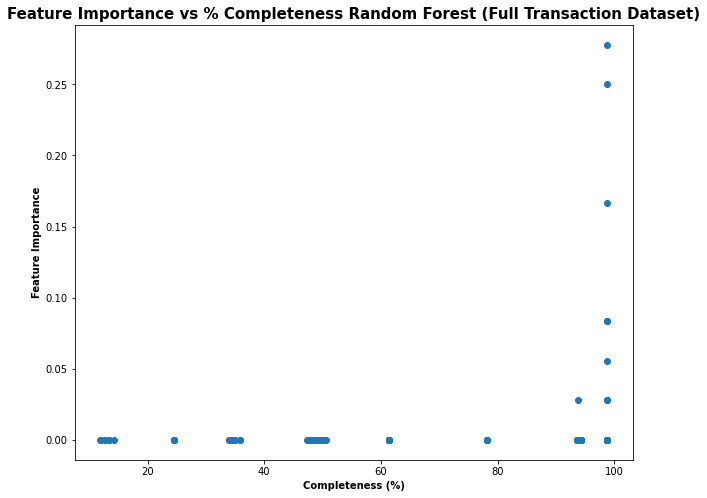

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x_colz, importances)
plt.title('Feature Importance vs % Completeness Random Forest (Full Transaction Dataset)',\
          fontsize = 15,fontdict=dict(weight='bold'))
plt.xlabel('Completeness (%)',fontsize = 10, fontdict=dict(weight='bold'))
plt.ylabel('Feature Importance',fontsize = 10, fontdict=dict(weight='bold'))
# plt.xscale('log')
plt.show()

In [ ]:
print("number of features that have non zero feature importances:", np.count_nonzero(importances))

number of features that have non zero feature importances: 9


Q: If you want to improve this model what kind of features would you design or incorporate in your data?

A: The answer will be using features that has very high percent completeness. Features that have feature importance of above 0.00 are the one with more than 90% completeness. Majority of the features have 0 feature importance and those features should be removed.

## Using the train data set

In [ ]:
x_colz_train = (X_train_annual != 0).astype(int).sum(axis=0)/len(X_train_annual)*100

In [ ]:
randomtree_ann_train = RandomForestClassifier(random_state=0, max_depth = 1, n_estimators=36, max_features = 14,
                                        class_weight = 'balanced')
randomtree_ann_train.fit(X_train_annual, y_train_annual) # fit non scaled data

RandomForestClassifier(class_weight='balanced', max_depth=1, max_features=14,
                       n_estimators=36, random_state=0)

In [ ]:
importances_train = randomtree_ann_train.feature_importances_
# importances_train

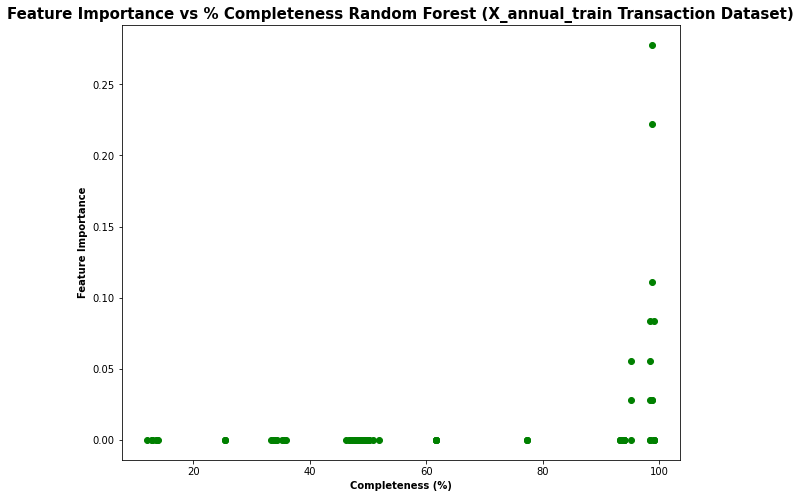

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x_colz_train, importances_train, color = 'green')
plt.title('Feature Importance vs % Completeness Random Forest (X_annual_train Transaction Dataset)',\
          fontsize = 15,fontdict=dict(weight='bold'))
plt.xlabel('Completeness (%)',fontsize = 10, fontdict=dict(weight='bold'))
plt.ylabel('Feature Importance',fontsize = 10, fontdict=dict(weight='bold'))
# plt.xscale('log')
plt.show()

In [ ]:
print("number of features that have non zero feature importances:", np.count_nonzero(importances_train))

number of features that have non zero feature importances: 11


Q: If you want to improve this model what kind of features would you design or incorporate in your data?

A: The answer will be using features that has very high percent completeness. Features that have feature importance of above 0.00 are the one with more than 90% completeness. Majority of the features have 0 feature importance and those features should be removed.